In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("PredictiveModelingAssessmentData.csv")

In [3]:
data.head()

,y,x1,x2
0,1.300215,-0.054425,0.738897
1,-0.805025,0.130174,0.977855
2,2.801926,1.749007,1.352562
3,3.123490,-0.979458,1.664484
4,3.445728,0.300521,2.988848


In [4]:
data.describe()

,y,x1,x2
count,5000.000000,5000.000000,5000.000000
mean,1.048158,-0.003752,1.503146
std,1.992383,1.008551,1.077676
min,-9.847133,-3.503908,0.015279
25%,-0.193654,-0.674079,0.733216
50%,1.002366,-0.002352,1.252496
75%,2.201069,0.664764,2.017572
max,10.274068,3.274246,8.126406


In [5]:
data.corr()

,y,x1,x2
y,1.000000,0.262895,0.631638
x1,0.262895,1.000000,0.006580
x2,0.631638,0.006580,1.000000


In [6]:
data.isnull().sum()

y     0
x1    0
x2    0
dtype: int64

In [7]:
data.dtypes

y     float64
x1    float64
x2    float64
dtype: object

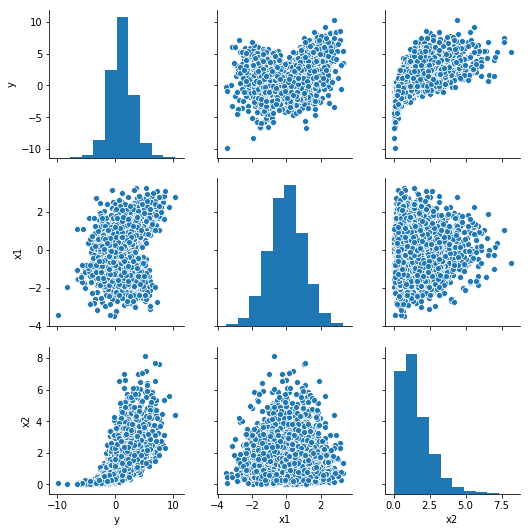

In [8]:
sns.pairplot(data)

# x2 is right skewed so, doing Normalization

In [9]:
data['log_x2'] = np.log10(data['x2'])

In [10]:
#data = data.drop(columns=['x2'])

In [11]:
data.head()

,y,x1,x2,log_x2
0,1.300215,-0.054425,0.738897,-0.131416
1,-0.805025,0.130174,0.977855,-0.009725
2,2.801926,1.749007,1.352562,0.131157
3,3.123490,-0.979458,1.664484,0.221280
4,3.445728,0.300521,2.988848,0.475504


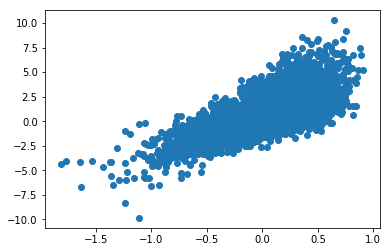

In [12]:
plt.scatter(data['log_x2'],data['y'])

In [13]:
cols = ['x1','log_x2']
X = data[cols]

In [14]:
y = data['y']

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(x_test_scaled)

# Finding the best value for n

In [28]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[i for i in range(2,26)]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 23}

In [29]:
model_k = neighbors.KNeighborsRegressor(n_neighbors = 23)
model_k.fit(X_train,y_train)
pred = model_k.predict(X_test)

In [30]:
df = pd.DataFrame({'Actual':y_test,'Predicted':pred})
df.head(25)

,Actual,Predicted
27,-0.114896,1.402291
1482,2.252994,3.949447
3021,3.018086,2.568199
3867,4.659242,5.823778
637,2.836476,1.917182
4191,3.221879,4.507267
3042,-0.979844,-0.072754
775,0.960689,1.105959
3767,0.835091,1.222950
3954,3.957962,4.170008


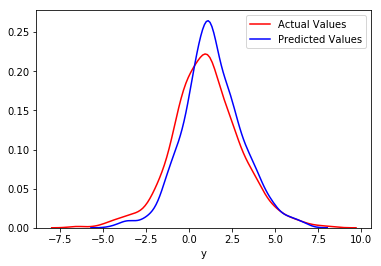

In [31]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Values")
sns.distplot(pred, hist=False, color="b", label="Predicted Values" , ax=ax1)

In [32]:
from sklearn.metrics import mean_squared_error,r2_score
print(f"The RMSE value is {np.sqrt(mean_squared_error(y_test,pred))}")

The RMSE value is 1.0997413901467057


In [34]:
print(f"The r2 score is {r2_score(y_test,pred)}")

The r2 score is 0.6985602374873445


In [23]:
final = pd.read_csv("TestData.csv")
final.head()

,ID,x1,x2
0,1,-1.372412,0.641527
1,2,-1.264036,1.581535
2,3,-0.662299,0.302180
3,4,-0.344315,2.481366
4,5,0.463254,1.923973


In [24]:
new_data = final[['x1','x2']]
new_data.head()

,x1,x2
0,-1.372412,0.641527
1,-1.264036,1.581535
2,-0.662299,0.302180
3,-0.344315,2.481366
4,0.463254,1.923973


In [25]:
new_data.describe()

,x1,x2
count,5000.000000,5000.000000
mean,0.000352,1.477657
std,1.005798,1.069932
min,-3.829158,0.004584
25%,-0.663976,0.700932
50%,0.001585,1.211241
75%,0.664033,1.972921
max,3.699641,8.322660


In [26]:
p = model_k.predict(new_data)
new_data['Predicted'] = p
new_data

,x1,x2,Predicted
0,-1.372412,0.641527,0.596873
1,-1.264036,1.581535,4.381457
2,-0.662299,0.302180,-0.926909
3,-0.344315,2.481366,5.037450
4,0.463254,1.923973,3.808166
5,-0.581261,2.348874,5.056395
6,-0.798126,0.727170,1.533742
7,-3.829158,0.417040,0.428401
8,-0.888441,0.393579,-0.228890
9,0.856076,1.382854,6.370824


In [27]:
new_data.describe()

,x1,x2,Predicted
count,5000.000000,5000.000000,5000.000000
mean,0.000352,1.477657,3.340385
std,1.005798,1.069932,2.638078
min,-3.829158,0.004584,-5.000805
25%,-0.663976,0.700932,1.912693
50%,0.001585,1.211241,4.177469
75%,0.664033,1.972921,5.022549
max,3.699641,8.322660,7.280978


In [727]:
new_data.to_csv('TestDataPredictions.csv')